<a href="https://colab.research.google.com/github/CHRISTOFORIDIS-CH/C_plus_plus_Projects/blob/main/Copy_of_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.unipi-pms-cs.gr/wp-content/uploads/2020/06/unipi-logo-dpr.png">

<center>
    <h1>ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ</h1>
    <h4>5ο εξάμηνο, υποχρεωτικό</h4>

----------
    
</center>

## 1. Εισαγωγή

Το παρών *jupyter notebook* πλαισιώνει την δουλεία και τα αποτελέσματα που εξήγαμε για την εργασία με τίτλο **Πρόγνωση Αποτελεσμάτων Ποδοσφαιρικών Αγώνων με χρήση Αλγορίθμων Μηχανικής Μάθησης** στο μάθημα της **Αναγνώρισης Προτύπων**.

> Το [Jupyter Notebook](http://jupyter.org/) είναι μια διαδικτυακή
> εφαρμογή, ελεύθερου λογισμικού και ανοιχτού κώδικα που σας επιτρέπει
> να δημιουργήσετε και να μοιραστείτε έγγραφα που περιέχουν κώδικα,
> εξισώσεις, γραφήματα, απεικονίσεις και επεξηγηματικό κείμενο. Το
> Jupyter notebook προσφέρει δυνατότητες παρουσίασης μορφοποιημένου
> κείμενου, μαθηματικών εξισώσεων και συμβόλων, και διαδραστικά στοιχεία
> με εκτελέσιμο κώδικα υπολογιστή, μέσα από το γνώριμο περιβάλλον του
> web browser. --
> [ellak.gr](https://edu.ellak.gr/2017/02/06/jupyter-notebook-dimiourgiste-ke-mirastite-diadrastikes-parousiasis-mathimatikon-statistikis-ke-programmatismou/)

Επιλέξαμε την συγκεκριμένη μορφή παρουσίασης καθώς μας δίνει την δυνατότητα να συνδυάσουμε την τεκμηρίωση(κείμενο & κώδικας LaTeX) μας με τα αντίστοιχα κομμάτια κώδικα τα οποία μπορούν να εκτελεστούν σε πραγματικό χρόνο από τον διδάσκοντα. Για την εκτέλεση των αντίστοιχων code snippets αρκεί να γίνει focus στο επιθυμητό κελί και να πατηθεί είτε το κουμπί Run από το κεντρικό μενού(Jupyter Notebook / Google Colab) είτε με τα πλήκτρα Cntrl + Enter.

## 2. Βιβλιοθήκες που χρησιμοποιήσαμε

Στα πλαίσια της εργασίας έγινε χρήση της γλώσσας προγραμματισμού *Python* καθώς και επιμέρους βιβλιοθηκών. Πιο συγκεκριμένα, πέρα από τις κλασικές βιβλιοθήκες της standard library όπου χρειάστηκαν για πολύ βασικές λειτουργίες όπως η επεξεργασία λιστών, έγινε χρήση επιστημονικών βιβλιοθηκών που ενδείκνυνται για μεγάλα δεδομένα. 

Αυτές είναι οι βιβλιοθήκες **Pandas** και **Numpy** που προορίζονται για επεξεργασία πινάκων - οργανωμένων δεδομένων σε tabular μορφή καθώς και οι βιβλιοθήκες **tensorflow**/**keras** και **sklearn**. Οι τελευταίες προσφέρουν αλγορίθμους αριθμητικής ανάλυσης, βελτιστοποίησης και ειδικά αλγορίθμους που χρειάζονται στο *machine learning*.

In [ ]:
import os.path
import operator
from os import path
 
import sqlite3
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

1. Η βιβλιοθήκη os παρέχει μια διεπαφή για την πρόσβαση στο σύστημα αρχείου του αντίστοιχου λειτουργικού. Στην περίπτωση μας χρησιμοποιείται για την αποθήκευση των δεδομένων αφού γίνει ο καθαρισμός και το αντίστοιχο processing.
    
2. Το πακέτο sqlite3 υλοποιεί ένα API σε Python για την πρόσβαση στις
    λειτουργίας μιας βάσης τύπου sqlite. 

3. Η βιβλιοθήκη Pandas χρησιμοποιείται για την μετατροπή του πίνακα της sqlite σε DataFrames.
    
4. Τα πακέτα sklearn/tensorflow χρησιμοποιούνται για την υλοποίηση των αλγορίθμων μηχανικής μάθησης, όπως για τους επαναληπτικούς αλγόριθμους βελτιστοποίησης, συναρτήσεις κόστους καθώς και για kfold validation και data scaling.

## 3. Φόρτωση Δεδομένων και Προεπεξεργασία

Αρχικά κατεβάσε το αρχείο το οποίο δίνεται από τον σύνδεσμο https://www.kaggle.com/hugomathien/soccer. Το σύνολο των δεδομένων είναι οργανομένω σε μια σχεσιακή βάση αρχείου τύπου Sqlite. Η βασή δεδομένων εμπεριέχει τους παρακάτω πίνακες. Ενδεικτικά αναφέρουμε και τον αριθμό εγγραφών που υπάρχει σε καθέναν από αυτούς.

Table	Total Rows	Total Columns

Country	11	2

League	11	3

Match	25979	115

Player	11060	7

Player_Attributes	183978	42

Team	299	5

Team_Attributes	1458	25


Για τα πλαίσια του μαθήματος χρησιμοποιήουμε τους πίνακες Match και Team_Attributes.

In [ ]:
con = sqlite3.connect("database.sqlite")

In [ ]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

print('Database Tables:')
print(cursor.fetchall())

Database Tables:
[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


### 3.1 Φόρτωση των πινάκων και μετατροπή αυτών σε Pandas DataFrames

In [ ]:
match = pd.read_sql_query("SELECT * from Match", con)
team_attributes = pd.read_sql_query("SELECT * from Team_Attributes", con)

### 3.2 Εξαγωγή χρονολογία εγγραφής για κάθε ομάδα από το κάθε timestamp

In [ ]:
match['date'] = pd.to_datetime(match['date'])
match['year'] = match['date'].dt.year

team_attributes['date'] = pd.to_datetime(team_attributes['date'])
team_attributes['year'] = team_attributes['date'].dt.year

### 3.3 Εξαγωγή των απαραίτητων στηλών που θα χρησιμοποιήσουμε κατά την διαδικασία της εκπαίδευσης

In [ ]:
match_attributes_to_keep = ['year', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA']
team_attributes_to_keep = ['year', 'team_api_id', 'buildUpPlaySpeed','buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression','defenceTeamWidth']

In [ ]:
match = match[match_attributes_to_keep]
team_attributes = team_attributes[team_attributes_to_keep]

Λάβαμε υπόψιν πως υπάρχουν εγγραφές στον πίνακα Match για τις οποίες τα αντίστοιχα διανύσματα προγνωστικών έχουν μηδενικές τιμές. Για τον σκοπό αυτό τις αντικαταστήσαμε με κενές μεταβλητές τύπου np.nan και ύστερα όσες εγγραφές είχαν nan στοιχεία τις αφαιρέσαμε.

In [ ]:
match = match.replace(np.nan, 0.0)
match = match.dropna()
team_attributes = team_attributes.dropna()

#### Πίνακας Match

In [ ]:
match

,year,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA
0,2008,9987,9993,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75
1,2008,10000,9994,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50
2,2008,9984,8635,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50
3,2008,9991,9998,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50
4,2008,7947,9985,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2015,10190,10191,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
25975,2015,9824,10199,1,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
25976,2015,9956,10179,2,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
25977,2015,7896,10243,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00


#### Πίνακας Team_Attributes

In [ ]:
team_attributes

,year,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,2010,9930,60,50,60,65,55,50,55,45
1,2014,9930,52,56,54,63,64,47,44,54
2,2015,9930,47,54,54,63,64,47,44,54
3,2010,8485,70,70,70,70,70,60,70,70
4,2011,8485,47,52,53,48,52,47,47,52
...,...,...,...,...,...,...,...,...,...,...
1453,2011,10000,52,52,52,48,53,46,48,53
1454,2012,10000,54,51,47,52,50,44,55,53
1455,2013,10000,54,51,47,52,32,44,58,37
1456,2014,10000,54,51,47,52,32,44,58,37


### 3.4 Κατασκευή των διανυσμάτων εκπαίδευσης

Για την κατασκευή του διανύσματος εκπαίδευσης χρειάστηκε να συνδυάσουμε δεδομένα τόσο για από τους πίνακες Matches όσο και Team_Attributes. Στον πίνακα Matches οι στήλες ['home_team_api_id', 'away_team_api_id'] αποτελούν ξένα κλειδιά προς τον πίνακα  Team_Attributes. Εκμεταλλευόμενοι αυτή την πληροφορία κατασκευάσαμε το σύνολο εκπαίδευσης το οποίο αποτελείται τόσο από τις βασικές πληροφορίες που περιγράφουν έναν αγώνα, δηλαδή τις στήλες με τα αντίστοιχα στατιστικά:

B365H, B365D, B365A,BWH, BWD, BWA, IWH, IWD, IWA, LBH, LBD, LBA

Η συνάρτηση -**create_training_set** δέχεται ως ορίσματα τους δύο διαφορετικούς πίνακες και αναλαμβάνει την διαδικασία κατασκευής του τελικού συνόλου.

In [ ]:
def create_training_set(matches, teams):
    training = []
    for index, row in matches.iterrows():
        home_team_id = row['home_team_api_id']
        away_team_id = row['away_team_api_id']
        match_year = row['year']
        
        home_team_data = teams[(teams.team_api_id == home_team_id)]
        home_team_data = home_team_data.drop(columns='team_api_id')
        home_team_data.columns = 'A' + home_team_data.columns 
        
        away_team_data = teams[(teams.team_api_id == away_team_id)]
        away_team_data = away_team_data.drop(columns='team_api_id')
        away_team_data.columns = 'B' + away_team_data.columns 
        
        try:
            tmp = pd.concat([row, home_team_data.iloc[1], away_team_data.iloc[1]], axis=0, join="inner")
        except:
            continue
        
        training.append(tmp)
        
    return training

In [ ]:
if path.exists("train_x.csv"):
    train_x = pd.read_csv('train_x.csv')
    columns_to_drop = ['Unnamed: 0', 'Byear', 'Ayear', 'r']
    train_x = train_x.drop(columns=columns_to_drop)
else:
    
    train_x = create_training_set(match, team_attributes)
    train_x = pd.DataFrame(train_x)
    train_x = train_x.drop(columns=['year', 'home_team_api_id', 'away_team_api_id'])

Το τελικό σύνολο εκαπίδευσης αποτελείται από τις παρακάτω, 30 σε αριθμό, στήλες:

In [ ]:
print(f'Number of columns: {len(train_x.columns)}')
train_x.columns

Number of columns: 30


Index(['home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'AbuildUpPlaySpeed', 'AbuildUpPlayPassing', 'AchanceCreationPassing',
       'AchanceCreationCrossing', 'AchanceCreationShooting',
       'AdefencePressure', 'AdefenceAggression', 'AdefenceTeamWidth',
       'BbuildUpPlaySpeed', 'BbuildUpPlayPassing', 'BchanceCreationPassing',
       'BchanceCreationCrossing', 'BchanceCreationShooting',
       'BdefencePressure', 'BdefenceAggression', 'BdefenceTeamWidth'],
      dtype='object')

Στην συνέχεια θα αφαιρεθούν οι ['home_team_goal', 'away_team_goal'] και θα αντικαταστθηθούν από την στήλη results όπου θα γίνει το διάνυσμα εικόνων.

### 3.5 Υπολογισμός μεταβλητής έκβασης κάθε αγώνα 

Με γνώμονα την εκφώνηση η μεταβλητή έκβασης του αγώνα υπολογίζεται ως εξής

$$
r =
\left\{
	\begin{array}{ll}
		H  & \mbox{if } a > 0 \\
        D  & \mbox{if } a = 0 \\
		A & \mbox{if } a < 0
	\end{array}
\right.
$$

Όταν η μεταβλητή $ a $ λαμβάνει θετικές τιμές αντιπροσωπεύει την νίκη του γηπεδούχου με τον αντίστοιχο αριθμό γκολ. όταν η μεταβλητή είναι μηδενική ή αρνητική, τότε ο αγώνας έληξε με ισοπαλία ή με νίκη της φιλοξενούμενης ομάδας αντίστοιχα.

Όπου $ a = G_mh -G_ah $

Για τον υπολογισμό της μεταβλητής $ α $ πραγματοποιούμε αφαίρεση διανυσμάτων τύπου στήλη και μορφής $ n x 1 $. Τα δύο αυτά διανύσματα εξάγονται από τις αντίστοιχες στήλες 'home_team_goal' και 'away_team_goal'. Το αποτέλεσμα απωθηκέυεται στην αντίστοιχ στήλη σημειωμένη με 'r' από την λέξη 'results'.

In [ ]:
train_x['r'] = train_x['home_team_goal'] - train_x['away_team_goal']

Χρήση μιας βοηθητικής δομής τύπου dictionary για την εκπαίδευση σε επίπεδο στοιχηματικής εταιρείας.

In [ ]:
companies = {
    'B364' : ['B365H', 'B365D', 'B365A' ,'r'],
    'BW': ['BWH', 'BWD', 'BWA', 'r'],
    'LW': ['IWH', 'IWD', 'IWA', 'r'],
    'LB': ['LBH', 'LBD', 'LBA', 'r']
}

### 3.6 Scaling των δεδομένων

Για να ελαχιστοποιήσουμε την επιρρόη μεγαλύτερων αριθμών στα αποτελέσματα της γραμμικής παλνιδρόμησης καθώς και του νευρωνικού δικτύου, μετασχηματίσαμε τα τελικά δεδομένα μεταφέροντας στο εύρος [0, N]. Για την επίτευξη της διαδικασίας αυτής χρησιμοποιήσαμε την κλάση MinMaxScaler της βιβλιοθήκης sklearn.

In [ ]:
scaler = MinMaxScaler()
kf = KFold(n_splits=10)

#### Βοηθητικές Συναρτήσεις 

Η συνάρτηση - best_booker(): Δέχεται ένα διάνυσμα όπου κάθε στοιχείο αποτελεί την μέση ακρίβεια του κάθε μοντέλου για κάθε στοιχηματική εταιρεία και σαν αποτέλεσμα αποτυπώνει την στοιχηματική εταιρεία με τα καλύτερα προγνωστικά.

Η συνάρτηση - cluster(): Δέχεται σαν είσοδο το διάνυσμα που αποτελείται από την μεταβλητή έκβασης κάθε αγώνα. Σαν εξόδο επιστρέφει μια τιμή από το σύνολο {H, D, A} για κάθε αγώνα. Η μετατροπή από τις αριθμητικές τιμές σε μια από τις διακρτικές τιμές έγινε με τον τρόπο που όριζε η εκφώνηση της εργασίας.

In [ ]:
def best_booker(accuracies):
    c = ['B364', 'BW', 'LW', 'LB']
    index, value = max(enumerate(accuracies), key=operator.itemgetter(1))
    
    return c[index]

def cluster(data):
    tmp = data
    normalized_result = [] 
    for i, res in enumerate(tmp):
        if res > 0:
            normalized_result.append('H')
        elif res == 0:
            normalized_result.append('D')
        else:
            normalized_result.append('A')
    return normalized_result

## Ερώτημα 1ο

    Να υλοποιήσετε τον Αλγόριθμο Ελάχιστου Μέσου Τετραγωνικού Σφάλματος (Least Mean Squares), ώστε ο εκπαιδευμένος ταξινομητής να υλοποιεί την συνάρτηση διάκρισης της μορφής
    𝒈𝒌 𝝍𝜿(𝒎):  ℝ𝟑→{𝑯,𝑫,𝑨}
    για κάθε στοιχηματική εταιρεία. Να αναγνωρίσετε την στοιχηματική εταιρεία τα προγνωστικά της οποίας οδηγούν σε μεγαλύτερη ακρίβεια ταξινόμησης. 

Για την υλοποίηση του αλγορίθμου Least Mean Squares, χρησιμοποιήσαμε έναν νευρώνα τύπου Perceptron, τον αλγόριθμο gradient descent για να την ανανέωση των βαρών καθώς και την συνάρτηση μέσου τετραγωνικού σφάλματος ως συνάρτηση κόστους.

Η συνάρτηση κόστους είναι πολύ σημαντική για τα νευρωνικά δίκτυα/αλγορίθμους βελτιστοποίησης και είναι ο μόνο τρόπος με τον οποίο μπορούμε να ποσοτικοποιήσουμε το σφάλμα τους. Η μείωση της ή καλύτερη η εύρεση ενός ελάχιστου σημείου, ισοδυναμεί με βελτίωση της απόδοσης του μοντέλου. Για κάθε δεδομένο συνδυασμό βαρών, η συνάρτηση κόστους μας βοηθάει να υπολογίσουμε το πραγματικό σφάλμα. Συνεπώς, είναι φανερό πως αν υπάρχει το ολικό της ελάχιστο δίνεται από τον καλύτερο δυνατό συνδυασμό βαρών, δηλαδή από τον συνδυασμό που προσεγγίζει καλύτερα την επιθυμητή συνάρτηση που μαθαίνει το νευρωνικό δίκτυο.

Σκοπός μας είναι να εντοπίσουμε την τιμή εκείνη που μας επιφέρει το ολικό ελάχιστο όπως φαίνεται στο σχήμα. Στην πράξη επειδή οι συναρτήσεις μας δεν είναι δισδιάστατες γραμμικές συναρτήσεις και μπορεί να υπάρξουν πολλά διαφορετικά βάρη, η συνάρτηση σφάλματος είναι πιθανόν να μοιάζει κάπως έτσι.

Σαν συνάρτηση κόστους επιλέξαμε την:

$$ MSE = \displaystyle\frac{1}{n}\sum_{t=1}^{n}(e_t^2 - y)^2 $$ 

Ο υπολογισμός των νέων βαρών γίνεται μέσω του αλγορίθμου Gradient Descent. Ως $ \eta $ ορίζουμε έναν θετικό αριθμό ο οποίος επηρεάζει την ταχύτητα μάθησης του μοντέλου μας. Ο αριθμός αυτός λέγεται και learning rate.

\begin{equation}
w_i = w_i - \eta \frac{\partial C}{\partial w_i}
\end{equation}

Κατά την μεταβολή του κάθε βάρους προκύπτει το ερώτημα του κατά πόσο θα πρέπει να τα μεταβάλουμε ή με άλλα λόγια πόσο συμμετέχει το κάθε βάρος στο συνολικό σφάλμα Τις απαντήσεις σε αυτά τα ερωτήματα μας τις δίνουν ο αλγόριθμος Backpropagation που υπολογίζει τις μερικές παραγώγους για τις μεταβλητές βαρών.



In [ ]:
accuracies = []
for betting_company in companies:
    tmp_train = train_x[companies[betting_company]].reset_index(drop=True)
    tmp_y = tmp_train['r']
    tmp_x = scaler.fit_transform(tmp_train.drop(columns=['r']))

    print("####################################################")
    print(f'Betting Company: {betting_company}')
    
    k = 1
    kf.get_n_splits(tmp_x)
    acc = 0
    for train_index, test_index in kf.split(tmp_x):
        X_train, X_test = tmp_x[train_index], tmp_x[test_index]
        y_train, y_test = tmp_y[train_index], tmp_y[test_index]
        model = Sequential()

        model.add(Dense(1, activation="linear"))
        opt = SGD(learning_rate=0.01)
        model.compile(loss='mean_squared_error', optimizer=opt)
        model.fit(X_train, np.array(y_train), epochs=3, verbose=0)
        
        prediction = scaler.transform(X_test)
        prediction = model.predict(prediction)
        prediction = cluster(prediction)
        y_test = cluster(y_test)
        print(f'Fold Number: {k}, {accuracy_score(y_test, prediction)}')
        acc = acc + accuracy_score(y_test, prediction)
        k = k + 1                      
    k = 0
    acc = acc / 10
    accuracies.append(acc)
    
print(f'Στοιχηματική Εταιρεία με τα καλύτερα πρωγνοστικά: {best_booker(accuracies)}')

####################################################
Betting Company: B364
Fold Number: 1, 0.46882217090069284
Fold Number: 2, 0.45681293302540416
Fold Number: 3, 0.26558891454965355
Fold Number: 4, 0.44757505773672057
Fold Number: 5, 0.47852193995381065
Fold Number: 6, 0.45404157043879906
Fold Number: 7, 0.3524249422632795
Fold Number: 8, 0.4369515011547344
Fold Number: 9, 0.4531177829099307
Fold Number: 10, 0.48267898383371827
####################################################
Betting Company: BW
Fold Number: 1, 0.46882217090069284
Fold Number: 2, 0.45681293302540416
Fold Number: 3, 0.4448036951501155
Fold Number: 4, 0.44757505773672057
Fold Number: 5, 0.47852193995381065
Fold Number: 6, 0.2812933025404157
Fold Number: 7, 0.2849884526558891
Fold Number: 8, 0.4369515011547344
Fold Number: 9, 0.4531177829099307
Fold Number: 10, 0.2836027713625866
####################################################
Betting Company: LW
Fold Number: 1, 0.2762124711316397
Fold Number: 2, 0.4600461893764

Στην παρακάτω απεικόνιση φαίνονται τα σημεία για τις τρείς διαφορετικές στήλες H,D,W για την εταιρεία BW.

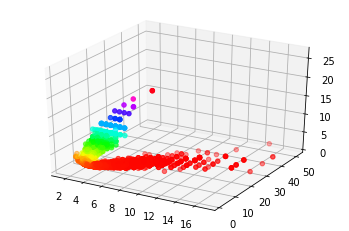

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = train_x['B365H']
x_points = train_x['B365D']
y_points = train_x['B365A']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.show()

## Ερώτημα 2ο

    Να υλοποιήσετε τον Αλγόριθμο Ελάχιστου Τετραγωνικού Σφάλματος (Least Squares), ώστε ο εκπαιδευμένος ταξινομητής να υλοποιεί την συνάρτηση διάκρισης της μορφής
    𝒈𝒌 𝝍𝜿(𝒎):  ℝ𝟑→{𝑯,𝑫,𝑨}
    για κάθε στοιχηματική εταιρεία. Να αναγνωρίσετε την στοιχηματική εταιρεία τα προγνωστικά της οποίας οδηγούν σε μεγαλύτερη ακρίβεια ταξινόμησης. 

Ο Αλγόριθμος Ελάχιστου Τετραγωνικού Σφάλματος (Least Squares) χρησιμοποιείται για την επίλυση προβλημάτων βελτιστοποίησης, συχνότερα για προβλήματα ελαχιστοποίησης. Στόχος του είναι να υπολογίσει την καλύτερη δυνατή ευθεία αν εξετάζουμε έναν δισδιάστατο χώρο, έτσι ώστε η απόσταση από τα μεμονωμένα σημεία του χώρου να ελαχιστοποιείται. Ο ίδιος αλγόριθμος μπορεί να αναχθεί και σε περισσότερες διαστάσεις, όπως π.χ. στον τρισδιάστατο χώρο όπου εκεί στόχος είναι ο υπολογισμός του καλύτερου επιπέδου.

Το μέτρο το οποίο αποτιμά την απόδοση του αλγορίθμου, δηλαδή η συνάρτηση κόστους είναι το τετραγωνικό σφάλμα:

$$ \hat{\epsilon} = \displaystyle\sum_{t=1}^{n}(e_t^2 - y)^2 $$ 

O τρόπος που υλοποιείται ο συγκεκριμένος αλγόριθμος δεν είναι επαναληπτικός αλλά στατιστικός αφού κάνει χρήση στατιστικών δικτών. Έτσι το πρόβλημα υπολογισμού της best-fitting-line μετατρέπεται σε πρόβλημα εύρεσης ενός γραμμικού πολυωνήμου, με σταθερό όρο

$$ \hat{\beta}_0 = \bar{Y} – \hat{\beta}_1 \bar{X} $$

και συντελεστή διεύθυνσης:

$$ \hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2} $$

με την τελική ευθεία να είναι η:

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\epsilon} $$

In [ ]:
reg = linear_model.LinearRegression()
accuracies = []
for betting_company in companies:
    tmp_train = train_x[companies[betting_company]].reset_index(drop=True)
    tmp_y = tmp_train['r']
    tmp_x = scaler.fit_transform(tmp_train.drop(columns=['r']))

    print("####################################################")
    print(f'Betting Company: {betting_company}')
    
    k = 1
    acc = 0
    kf.get_n_splits(tmp_x)
    for train_index, test_index in kf.split(tmp_x):
        X_train, X_test = tmp_x[train_index], tmp_x[test_index]
        y_train, y_test = tmp_y[train_index], tmp_y[test_index]
        reg.fit(X_train, y_train)
        
        prediction = scaler.transform(X_test)
        prediction = reg.predict(prediction)
        prediction = cluster(prediction)
        y_test = cluster(y_test)
        print(f'Fold Number: {k}, {accuracy_score(y_test, prediction)}')
        acc = acc + accuracy_score(y_test, prediction)
        k = k + 1                      
    k = 0
    acc = acc / 10
    accuracies.append(acc)
    
print(f'Στοιχηματική Εταιρεία με τα καλύτερα πρωγνοστικά: {best_booker(accuracies)}')

####################################################
Betting Company: B364
Fold Number: 1, 0.46882217090069284
Fold Number: 2, 0.45681293302540416
Fold Number: 3, 0.4448036951501155
Fold Number: 4, 0.44757505773672057
Fold Number: 5, 0.47852193995381065
Fold Number: 6, 0.45404157043879906
Fold Number: 7, 0.4780600461893764
Fold Number: 8, 0.4369515011547344
Fold Number: 9, 0.4531177829099307
Fold Number: 10, 0.4836027713625866
####################################################
Betting Company: BW
Fold Number: 1, 0.46882217090069284
Fold Number: 2, 0.45681293302540416
Fold Number: 3, 0.4448036951501155
Fold Number: 4, 0.44757505773672057
Fold Number: 5, 0.47852193995381065
Fold Number: 6, 0.45404157043879906
Fold Number: 7, 0.4780600461893764
Fold Number: 8, 0.4369515011547344
Fold Number: 9, 0.4531177829099307
Fold Number: 10, 0.48314087759815244
####################################################
Betting Company: LW
Fold Number: 1, 0.46882217090069284
Fold Number: 2, 0.456812933025

## Ερώτημα 3ο

Να υλοποιήσετε ένα πολυστρωματικό νευρωνικό δίκτυο, ώστε ο εκπαιδευμένος ταξινομητής να υλοποιεί μια συνάρτηση διάκρισης της μορφής
𝒈𝜱(𝒎):
ℝ𝟐𝟖→{𝑯,𝑫,𝑨}
,  όπου το
𝜱(𝒎)∈
ℝ𝟐𝟖
αντιστοιχεί στο πλήρες διάνυσμα χαρακτηριστικών του κάθε αγώνα που δίνεται από την σχέση.
 
 

In [ ]:
columns_to_drop = ['home_team_goal', 'away_team_goal', 'r']

In [ ]:
tmp_y = train_x['r']
tmp_x = scaler.fit_transform(train_x.drop(columns=columns_to_drop))

print("####################################################")
print('Neural Network Training')
    
k = 1
kf.get_n_splits(tmp_x)
acc = 0
for train_index, test_index in kf.split(tmp_x):
    X_train, X_test = tmp_x[train_index], tmp_x[test_index]
    y_train, y_test = tmp_y[train_index], tmp_y[test_index]
    model = Sequential()

    model.add(Dense(14, activation="linear"))
    model.add(Dense(14, activation="linear"))
    model.add(Dense(1, activation="linear"))
    
    opt = SGD(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=opt)
    model.fit(X_train, np.array(y_train), epochs=3)
        
    prediction = scaler.transform(X_test)
    prediction = model.predict(prediction)
    prediction = cluster(prediction)
    y_test = cluster(y_test)
    print(f'Fold Number: {k}, {accuracy_score(y_test, prediction)}')
    acc = acc + accuracy_score(y_test, prediction)
    k = k + 1                      

####################################################
Neural Network Training
Train on 19485 samples
Epoch 1/3
19485/19485 [==============================] - 1s 42us/sample - loss: 2.8149
Epoch 2/3
19485/19485 [==============================] - 1s 28us/sample - loss: 2.5862
Epoch 3/3
19485/19485 [==============================] - 1s 26us/sample - loss: 2.5704
Fold Number: 1, 0.2762124711316397
Train on 19485 samples
Epoch 1/3
19485/19485 [==============================] - 1s 43us/sample - loss: 2.7256
Epoch 2/3
19485/19485 [==============================] - 0s 25us/sample - loss: 2.5736
Epoch 3/3
19485/19485 [==============================] - 0s 24us/sample - loss: 2.5654
Fold Number: 2, 0.2905311778290993
Train on 19485 samples
Epoch 1/3
19485/19485 [==============================] - 1s 43us/sample - loss: 2.7495
Epoch 2/3
19485/19485 [==============================] - 0s 24us/sample - loss: 2.6183
Epoch 3/3
19485/19485 [==============================] - 0s 24us/sample - loss: 2.6073
F